In [4]:
import seaborn as sns 

In [20]:
df=sns.load_dataset('titanic')

In [ ]:
df.head().sum()

In [8]:
## check missing values 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
## delete the rows or datapoints to handle missing values 
df.shape

(891, 15)

In [13]:
df.dropna().shape

(182, 15)

In [17]:
## column wise
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation missing values techniques
1 - Mean Value Imputation 

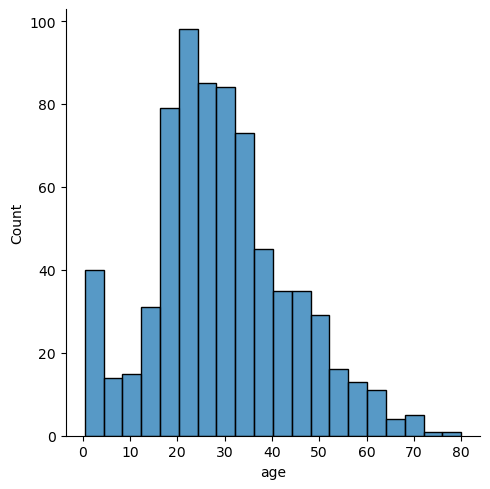

In [22]:
sns.displot(df['age'])

<AxesSubplot: xlabel='age', ylabel='Count'>

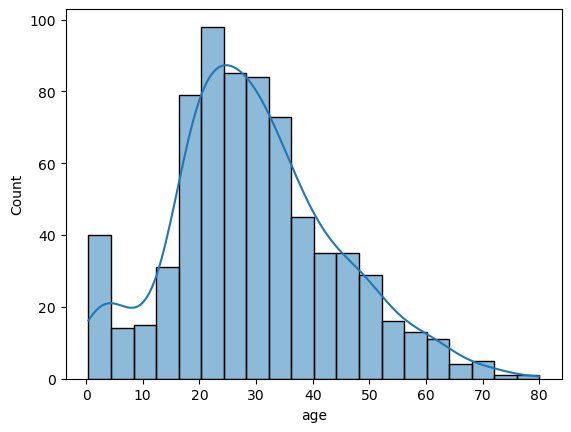

In [24]:
sns.histplot(df['age'],kde=True)

In [31]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [32]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
## Mean imputation works well when we have normally distributed data 

### 2. Median value Imputation - if we have outliers in the dataset

In [34]:
df['age_median']=df['age'].fillna(df['age'].median())

In [36]:
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [37]:
df['age_median']=df['age'].fillna(df['age'].median())

### 3. Mode Imputation technique- used for categorical values 

In [40]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median,age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [41]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
df[df['embarked'].notna()]['embarked'].mode()

0    S
Name: embarked, dtype: object

In [46]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [47]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [48]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [49]:
df['embarked'].isnull().sum()

2

In [50]:
df['embarked_mode'].isnull().sum()

0

## Handling Imbalanced Dataset
1- Up sampling
2-Down Sampling

In [5]:
import numpy as np
import pandas as pd 

## set the random seeds for the reproductivity 
np.random.seed(123)

## create a dataframe with 2 classes 
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples * class_0_ratio)
n_class_1=n_samples - n_class_0

In [53]:
n_class_0,n_class_1

(900, 100)

In [78]:
## create my Dataset with imbalanced dataset
class_0 =pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target':[0]*n_class_0
})

class_1 =pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1] * n_class_1
})
    

In [63]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [64]:
df.head()

,feature_1,feature_2,target
0,0.952428,0.187717,0
1,-1.440741,-0.645577,0
2,-0.965990,-1.681755,0
3,0.418120,-0.452987,0
4,0.276539,-0.057330,0


In [65]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [66]:
## Unsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [6]:
from sklearn.utils import resample

In [69]:
df_minority_upsampled=resample(df_minority,replace=True,## sample with replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [72]:
df_minority_upsampled.shape

(900, 3)

In [73]:
df_minority_upsampled.head()


,feature_1,feature_2,target
951,1.468346,4.488096,1
992,3.149823,-0.563817,1
914,1.943998,3.041947,1
971,2.749281,2.378871,1
960,0.759437,2.260688,1


In [76]:
df_unsampled=pd.concat([df_majority,df_minority_upsampled])

In [77]:
df_unsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## Down Sampling

In [ ]:
class_0 =pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target':[0]*n_class_0
})

class_1 =pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1] * n_class_1
})
    

In [80]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [81]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [82]:
df_majority_upsampled=resample(df_majority,replace=False,## downsize
         n_samples=len(df_minority),
         random_state=42
        )

In [84]:
df_majority_upsampled.shape

(100, 3)

In [85]:
df_downsampled=pd.concat([df_minority,df_majority_upsampled])

In [87]:
df_downsampled['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

# SMOTE

In [11]:
from sklearn.datasets import make_classification

In [12]:
make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [13]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [14]:
x,y

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [15]:
import pandas as pd 
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [16]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

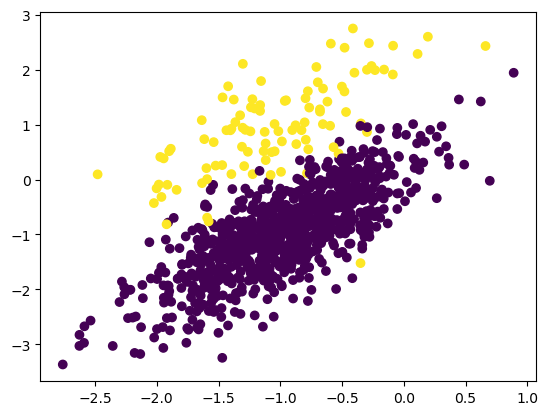

In [17]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [18]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.oversampling import SMOTE

ModuleNotFoundError: No module named 'imblearn.oversampling'

In [20]:
from imblearn.oversampling import SMOTE

ModuleNotFoundError: No module named 'imblearn.oversampling'

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from imblearn.oversampling import SMOTE

ModuleNotFoundError: No module named 'imblearn.oversampling'

In [26]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
## Transform the dataset 
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [30]:
x.shape

(1800, 2)

In [31]:
y.shape

(1800,)

In [35]:
len(y[y==0])

900

In [36]:
len(y[y==1])

900

In [38]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)


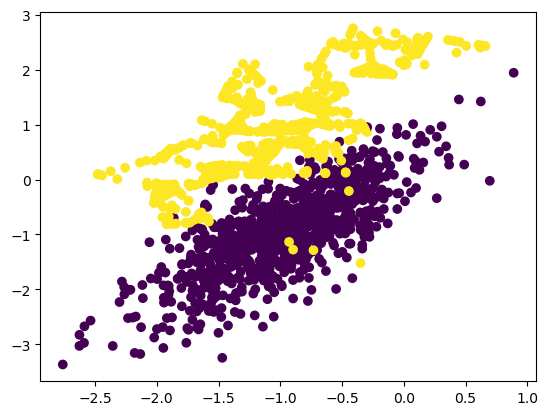

In [39]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

# Data Interpolation

## Linear Interpolation

In [3]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

In [2]:
import matplotlib.pyplot as plt

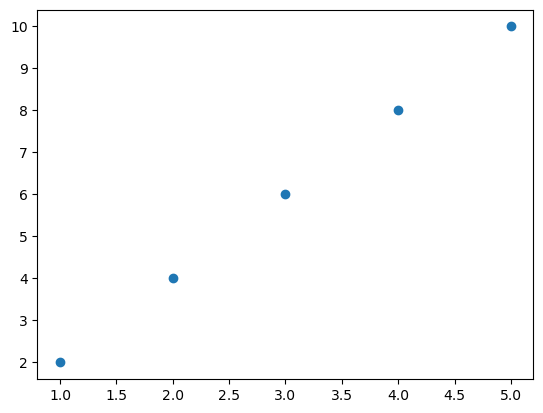

In [4]:
plt.scatter(x,y)

In [6]:
## interpolate the data using Linear Interpolation
x_new=np.linspace(1,5,10) ##create new x values 
y_interp=np.interp(x_new,x,y)

In [7]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

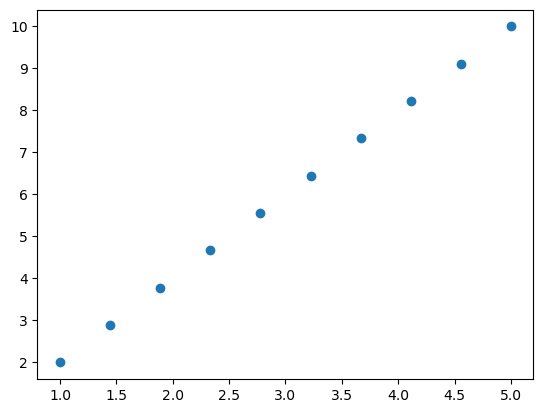

In [10]:
plt.scatter(x_new,y_interp)

## 2 Cubic Interpolation 

In [4]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [1]:
from scipy.interpolate import interp1d

In [5]:
## createa cubic interpolation function 
f=interp1d(x,y,kind='cubic')

In [7]:
x_new=np.linspace(1,5,10)
y_interp=f(x_new)

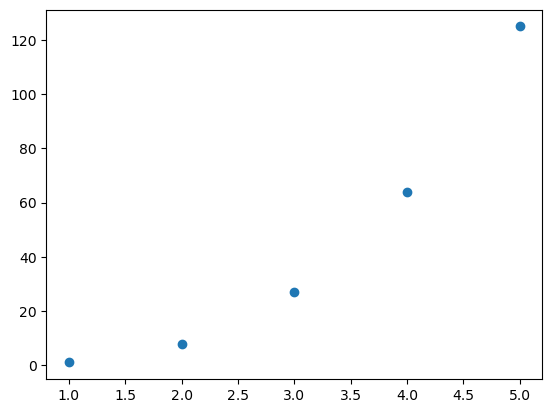

In [9]:
plt.scatter(x,y)

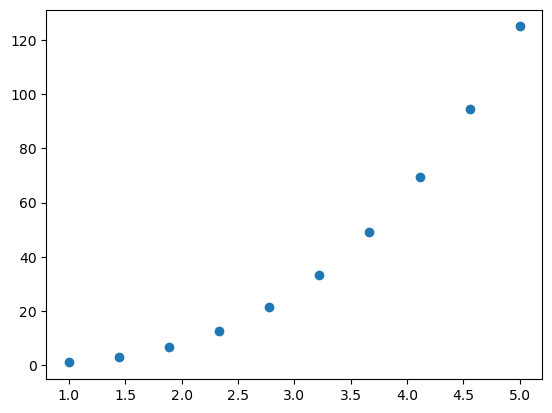

In [10]:
plt.scatter(x_new,y_interp)

## Polynomial Interpolation 

In [11]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [12]:
## interpolate the data usuing polynomial interpolation
p=np.polyfit(x,y,2)

In [13]:
x_new=np.linspace(1,5,10)
y_interp=np.polyval(p,x_new)

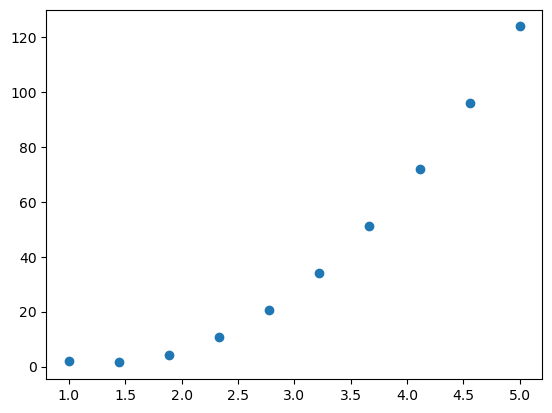

In [14]:
plt.scatter(x_new,y_interp)